In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/xiecheng_hotel.csv')
data.head()

,order_id,crawl_datetime,url,hotel_name,post_time,user_level,user_name,content,user_score
0,1,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2018-01-05,level_new,M***1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,5.0
1,2,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-09-30,level_new,M***6,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,4.5
2,3,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-08-15,level_new,_***1,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,1.0
3,4,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-05-07,level_daren,阿龙,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,3.0
4,5,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-04-01,level_new,M***4,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,3.5


#  model1

In [32]:
from snownlp import SnowNLP
def get_sa(text_list): 
    sa_score = []
    for text in text_list:
        sa = SnowNLP(str(text).strip())
        sa_score.append(round(sa.sentiments,3))
    return sa_score
predict_text = ['这个我不喜欢', '这个我喜欢不']
%time get_sa(predict_text)

Wall time: 3.97 ms


[0.588, 0.588]

#  model2

In [3]:
from process.sa_model_predict import SA
# tf模型加载需要预热
predict_text = ['这个我不喜欢', '这个我喜欢不']
model = SA()
%time sa_score = model.predict(predict_text)
print(sa_score)

Wall time: 1.63 s
[[0.15468428]
 [0.43471047]]


In [33]:
# 使用lambda代替循环
# %time data['sa_model_score1']= data['content'].apply(lambda x : get_sa(x))
# 使用内循环
%time data['sa_model_score1']= get_sa(data['content']

Wall time: 1min 8s


In [35]:
# 批处理提升50倍
%time data['sa_model_score2']= [round(float(i),3) for i in  model.predict(data['content'])]

Wall time: 1.42 s


In [36]:
data.head(1)

,order_id,crawl_datetime,url,hotel_name,post_time,user_level,user_name,content,user_score,sa_model_score1,sa_model_score2,user_score_normal
0,1,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2018-01-05,level_new,M***1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,5.0,0.883,0.188,1.0


In [6]:
# 清洗数据并归一化用户打分
data['user_score'] = data['user_score'].apply(lambda x : 0 if x == '信息不存在' else float(x))
%time data['user_score_normal']= data['user_score'].apply(lambda x : round(x/5,3))
data.head()

Wall time: 7 ms


,order_id,crawl_datetime,url,hotel_name,post_time,user_level,user_name,content,user_score,sa_model_score1,sa_model_score2,user_score_normal
0,1,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2018-01-05,level_new,M***1,真的不错，看到这个评论有些人说不怎么好，个人有点小洁癖，害怕卫生不干净，但是去了之后，发现房...,5.0,0.883,0.188292,1.0
1,2,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-09-30,level_new,M***6,第一次到武隆玩，觉得酒店卫生各方面还行，服务态度好，吃饭方便楼下特色小吃也很多，老板娘还亲自...,4.5,1.000,0.996451,0.9
2,3,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-08-15,level_new,_***1,要去武隆天生三桥，晚上坐火车到了。如果想旅途开心，还是不要住这里了。第一，床单上黄的、黑的，...,1.0,0.000,0.001503,0.2
3,4,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-05-07,level_daren,阿龙,怎么说呢？这家酒店离车站很近，比较方便，我们是在五一前订的，价格才88，不知道是不是比较便宜...,3.0,0.001,0.103732,0.6
4,5,2018-03-27 16:26:17,http://hotels.ctrip.com/hotel/dianping/1490366...,武隆强兴客栈,发表于2017-04-01,level_new,M***4,老板人很好，为了方便我们停车还特地给我们占着停车位。感觉还是挺干净的，被子上折痕还在，应该是...,3.5,1.000,0.442257,0.7


In [37]:
# 数据抽样
model_score1 = data['sa_model_score1']
model_score2 = data['sa_model_score2']
user_score = data['user_score_normal']

# 结果可视化

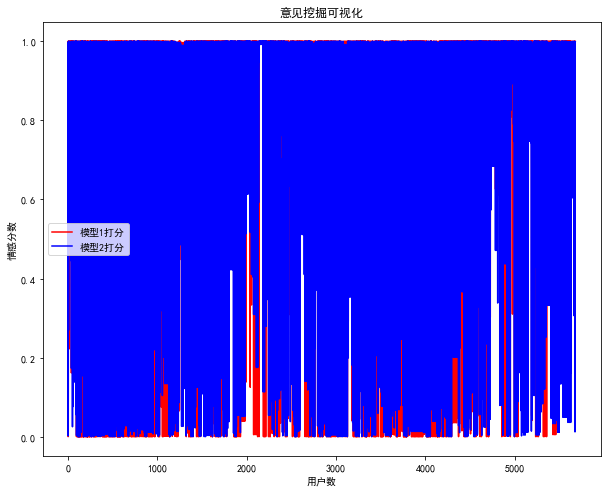

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(model_score1, color='red', label='模型1打分')
# plt.plot(user_score,  color='blue', label='用户打分')
plt.plot(model_score2,  color='blue', label='模型2打分')
plt.legend() # 显示图例
plt.xlabel('用户数')
plt.ylabel('情感分数')
plt.title('意见挖掘可视化')
plt.show()

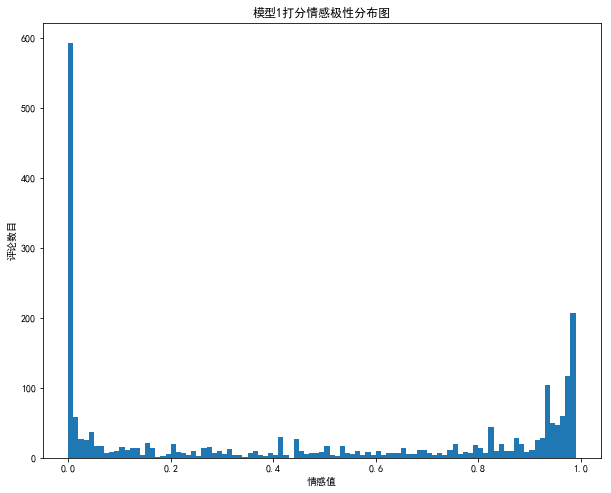

In [39]:
# 模型1打分
import numpy as np
plt.hist(model_score1, bins=np.arange(0, 1, 0.01))
plt.xlabel("情感值")
plt.ylabel("评论数目")
plt.title('模型1打分情感极性分布图')
plt.show()

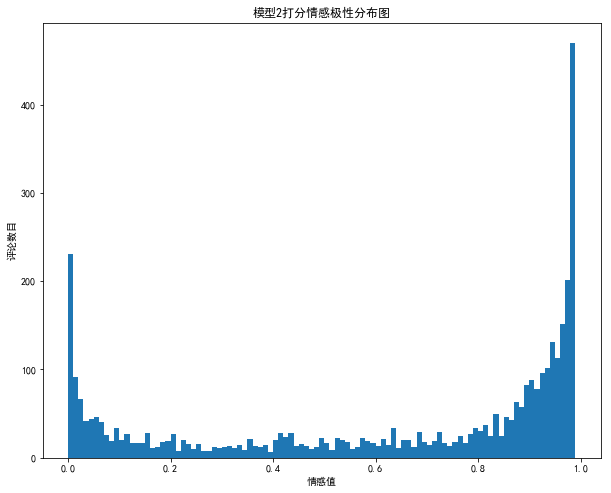

In [40]:
# 模型2打分
import numpy as np
plt.hist(model_score2, bins=np.arange(0, 1, 0.01))
plt.xlabel("情感值")
plt.ylabel("评论数目")
plt.title('模型2打分情感极性分布图')
plt.show()

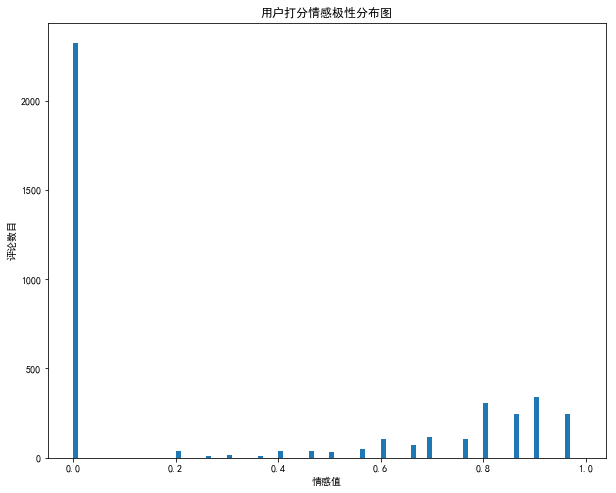

In [41]:
# 用户打分
plt.hist(user_score, bins=np.arange(0, 1, 0.01))
plt.xlabel("情感值")
plt.ylabel("评论数目")
plt.title('用户打分情感极性分布图')
plt.show()

In [42]:
#  pandas的用户打分和模型打分统计-数据抽样
static = data[['sa_model_score1','sa_model_score2','user_score_normal']]
static.describe()

,sa_model_score1,sa_model_score2,user_score_normal
count,5677.000000,5677.000000,5677.000000
mean,0.794763,0.756779,0.521001
std,0.364549,0.343640,0.452833
min,0.000000,0.000000,0.000000
25%,0.830000,0.592000,0.000000
50%,0.999000,0.955000,0.760000
75%,1.000000,0.997000,1.000000
max,1.000000,1.000000,1.000000


# 总结
1. tf模型需要预热,但是通过批量预测可以大大缩短总时间
2. tf模型由于未对评价数据进行拟合,效果不是很好
3. tf模型不会给出1分